## Loading the CIFAR10 data set

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocess the data

In [0]:
from keras.utils import to_categorical

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Underfit model

## Build the model

In [0]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [0]:
from keras import optimizers

opt = optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## Fit the model

In [0]:
epochs = 20

history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 150us/step - loss: 2.2688 - acc: 0.1210 - val_loss: 2.1987 - val_acc: 0.1611
Epoch 2/20
50000/50000 [==============================] - 5s 94us/step - loss: 2.2207 - acc: 0.1364 - val_loss: 2.1093 - val_acc: 0.2127
Epoch 3/20
50000/50000 [==============================] - 5s 92us/step - loss: 2.1544 - acc: 0.1693 - val_loss: 2.0188 - val_acc: 0.2432
Epoch 4/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.1033 - acc: 0.1759 - val_loss: 1.9249 - val_acc: 0.2744
Epoch 5/20
50000/50000 [==============================] - 5s 93us/step - loss: 2.0702 - acc: 0.1861 - val_loss: 1.9123 - val_acc: 0.2868
Epoch 6/20
50000/50000 [==============================] - 5s 91us/step - loss: 2.0451 - acc: 0.1979 - val_loss: 1.8636 - val_acc: 0.3328
Epoch 7/20
50000/50000 [==============================] - 5s 92us/step - loss: 2.0160 - acc: 0.2146 - val_loss: 1.8418 - val_ac

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/step
Test accuracy: 0.5091


## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

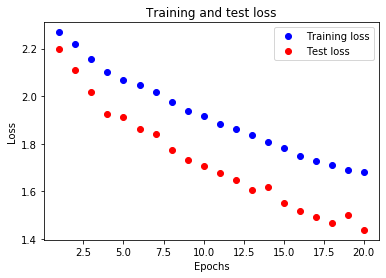

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

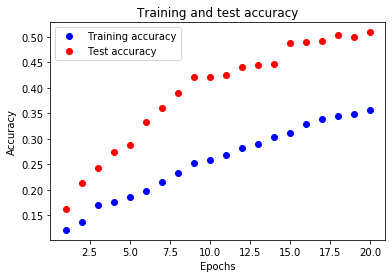

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit model

## Build the model

In [0]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [0]:
from keras import optimizers

opt = optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## Fit the model

In [0]:
epochs = 20

history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 191us/step - loss: 1.6792 - acc: 0.4023 - val_loss: 1.4726 - val_acc: 0.4802
Epoch 2/20
50000/50000 [==============================] - 8s 164us/step - loss: 1.3330 - acc: 0.5302 - val_loss: 1.2774 - val_acc: 0.5581
Epoch 3/20
50000/50000 [==============================] - 8s 163us/step - loss: 1.1649 - acc: 0.5896 - val_loss: 1.1602 - val_acc: 0.5886
Epoch 4/20
50000/50000 [==============================] - 8s 165us/step - loss: 1.0493 - acc: 0.6348 - val_loss: 1.0945 - val_acc: 0.6096
Epoch 5/20
50000/50000 [==============================] - 8s 164us/step - loss: 0.9573 - acc: 0.6677 - val_loss: 1.0022 - val_acc: 0.6558
Epoch 6/20
50000/50000 [==============================] - 8s 164us/step - loss: 0.8774 - acc: 0.6980 - val_loss: 0.9941 - val_acc: 0.6583
Epoch 7/20
50000/50000 [==============================] - 8s 165us/step - loss: 0.8134 - acc: 0.7195 - val_loss: 0.9628 -

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 95us/step
Test accuracy: 0.7051


## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

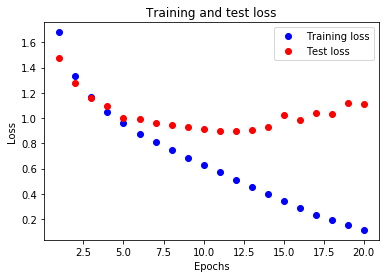

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

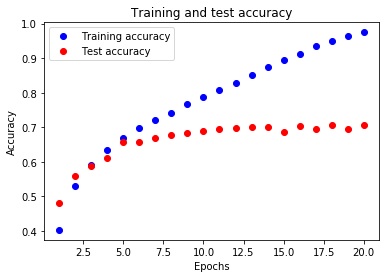

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "Pretty good" Model

## Build the model

In [0]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [0]:
from keras import optimizers

opt = optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## Fit the model

In [0]:
epochs = 20

history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 227us/step - loss: 1.9522 - acc: 0.2740 - val_loss: 1.6572 - val_acc: 0.3876
Epoch 2/20
50000/50000 [==============================] - 9s 175us/step - loss: 1.6249 - acc: 0.4014 - val_loss: 1.5004 - val_acc: 0.4441
Epoch 3/20
50000/50000 [==============================] - 9s 175us/step - loss: 1.4857 - acc: 0.4582 - val_loss: 1.3839 - val_acc: 0.4998
Epoch 4/20
50000/50000 [==============================] - 9s 177us/step - loss: 1.3894 - acc: 0.4965 - val_loss: 1.3438 - val_acc: 0.5114
Epoch 5/20
50000/50000 [==============================] - 9s 175us/step - loss: 1.3133 - acc: 0.5241 - val_loss: 1.2130 - val_acc: 0.5673
Epoch 6/20
50000/50000 [==============================] - 9s 175us/step - loss: 1.2311 - acc: 0.5595 - val_loss: 1.1116 - val_acc: 0.6059
Epoch 7/20
50000/50000 [==============================] - 9s 179us/step - loss: 1.1606 - acc: 0.5868 - val_loss: 1.0709 -

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 105us/step
Test accuracy: 0.7737


## Training/test loss/accuracy during training

In [0]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

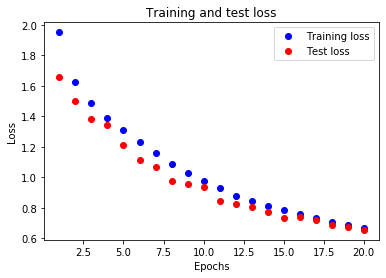

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

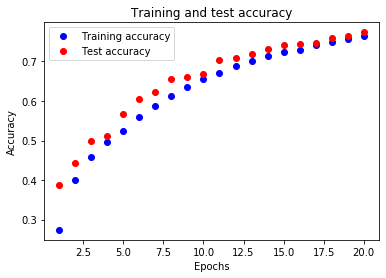

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()